In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats
import pandas as pd
from scipy.io import loadmat
from utils import default_paths, prf_utils, nsd_utils
from model_fitting import initialize_fitting
from feature_extraction import fwrf_features

In [2]:
from feature_extraction import gabor_feature_extractor

n_ori=12; n_sf=8;
_gabor_ext_complex = gabor_feature_extractor.gabor_extractor_multi_scale(n_ori=n_ori, n_sf=n_sf)
spat_kernels = _gabor_ext_complex.filter_stack

screen_eccen_deg=8.4

sf_cyc_per_stim = np.array(_gabor_ext_complex.feature_table['SF: cycles per stim'])
sf_cyc_per_deg = sf_cyc_per_stim/screen_eccen_deg
sf_unique, sf_inds = np.unique(sf_cyc_per_deg, return_inverse=True)

ori_deg = np.array(_gabor_ext_complex.feature_table['Orientation: degrees'])
ori_unique, orient_inds = np.unique(ori_deg, return_inverse=True)


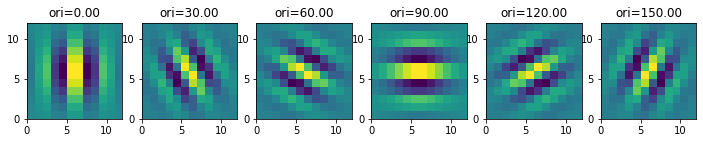

In [30]:
plt.figure(figsize=(12,4));
for ki, kk in enumerate(np.arange(0,12,2)):
    plt.subplot(1,6,ki+1)
    plt.pcolormesh(np.real(spat_kernels[kk,0,:,:]))
    plt.title('ori=%.2f'%ori_unique[kk])
    plt.axis('square')
    # plt.gca().invert_yaxis()

In [42]:
prf_models = initialize_fitting.get_prf_models(which_grid=5)
angle, eccen = prf_utils.cart_to_pol(prf_models[:,0]*8.4, prf_models[:,1]*8.4)
angle = np.round(angle,1)
eccen = np.round(eccen,2)
size = np.round(prf_models[:,2]*8.4,2)
aa = np.unique(angle)[14];
ee = np.unique(eccen)[3];
ss = np.unique(size)[4];
mm = np.where((angle==aa) & (eccen==ee) & (size==ss))[0][0]
mm

590

In [4]:
mm = 378

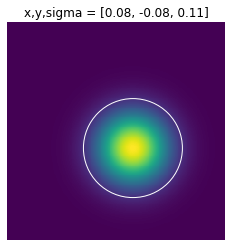

In [43]:
x,y,sigma = prf_models[mm,:]
n_pix = 240
prf_2d = prf_utils.gauss_2d(center=[x,y], sd=sigma, patch_size=n_pix)


plt.figure();
ax = plt.subplot(1,1,1)
plt.pcolormesh(prf_2d)
plt.axis('off')
plt.axis('square')
plt.gca().invert_yaxis()
plt.title('x,y,sigma = [%.2f, %.2f, %.2f]'%(x,y,sigma));

center_in_image = np.array((n_pix/2 + x*n_pix, n_pix/2 - n_pix*y))
size_in_image = 2*sigma*n_pix
circ = matplotlib.patches.Circle(center_in_image, size_in_image, 
                                                 color = 'w', fill=False)
ax.add_artist(circ)

In [44]:
subject =1
which_prf_grid=5
feat_loader_gabor = fwrf_features.fwrf_feature_loader(subject=subject,\
                                which_prf_grid=which_prf_grid, \
                                feature_type='gabor_solo',\
                                n_ori=12, n_sf=8, nonlin=True, \
                                prf_batch_size=1)
inds_load = np.arange(1000) 
feat, _ = feat_loader_gabor.load(inds_load, prf_model_index=mm)

Loading pre-computed features for models [590 - 590] from /user_data/mmhender/features/gabor_texture/S1_features_each_prf_12ori_8sf_gabor_solo_nonlin_grid5.h5py
Took 0.92298 seconds to load file
Size of features array for this image set is:
(1000, 96, 1)
Index into batch for prf 590: 0
Size of features array for this image set and prf is:
(1000, 96)
Final size of feature matrix is:
(1000, 96)


In [45]:
image_data = nsd_utils.get_image_data(subject)
image_data = image_data[inds_load,:,:,:]
image_data = nsd_utils.image_uncolorize_fn(image_data)


Loading images for subject 1

image data size: (10000, 3, 240, 240) , dtype: uint8 , value range: 0 255


In [52]:
def plot_top_ims(features_to_plot, top_n=5):

    center_in_image = np.array((n_pix/2 + x*n_pix, n_pix/2 - n_pix*y))
    size_in_image = 2*sigma*n_pix

    for fi, ff in enumerate(features_to_plot):

        zvals = scipy.stats.zscore(feat[:,ff])
        top_image_inds = np.flip(np.argsort(zvals))[0:top_n]
        top_images = image_data[top_image_inds,0,:,:]

        plt.figure(figsize=(12,2));
        plt.subplot(1,6,1)
        plt.pcolormesh(np.real(spat_kernels[np.mod(ff, n_ori),0,:,:]))
        plt.axis('square')
        plt.gca().invert_yaxis()
        plt.axis('off')

        for ii in range(top_n):
            ax = plt.subplot(1,6,ii+2);
            plt.pcolormesh(top_images[ii,:,:])
            plt.axis('square')
            plt.gca().invert_yaxis()
            # plt.imshow(top_images[ii,:,:])
            circ = matplotlib.patches.Circle(center_in_image, size_in_image, 
                                                         color = 'w', fill=False)
            ax.add_artist(circ)
            plt.axis('off')

        plt.suptitle('feature %d, orient=%.1f, sf=%.2f'%(ff, \
            ori_deg[ff], sf_cyc_per_deg[ff]))

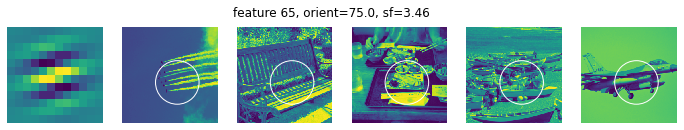

In [54]:
features_to_plot = [65]
plot_top_ims(features_to_plot, top_n=5)

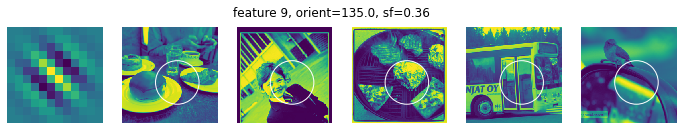

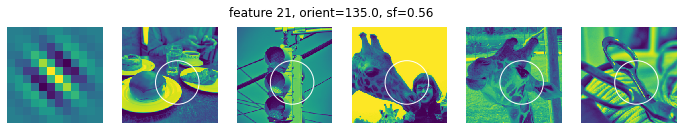

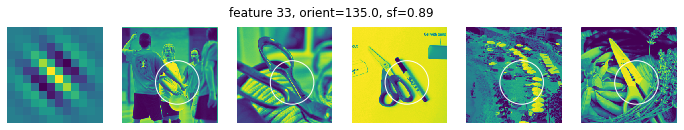

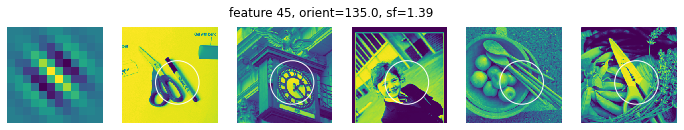

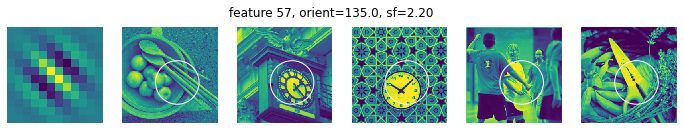

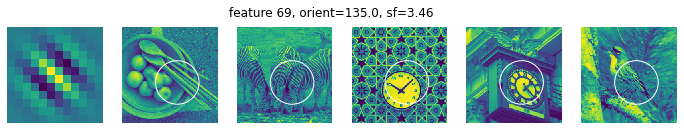

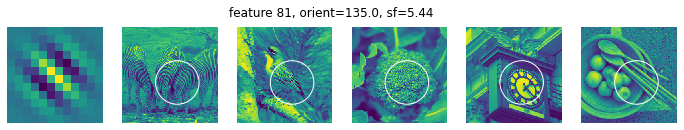

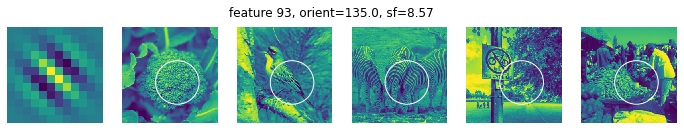

In [55]:
features_to_plot = np.where(np.round(ori_deg,1)==135.0)[0]
plot_top_ims(features_to_plot, top_n=5)

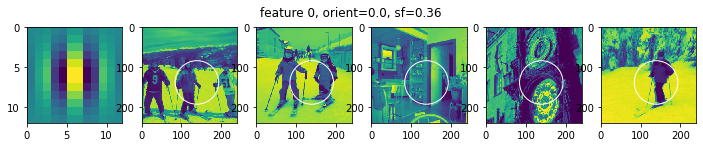

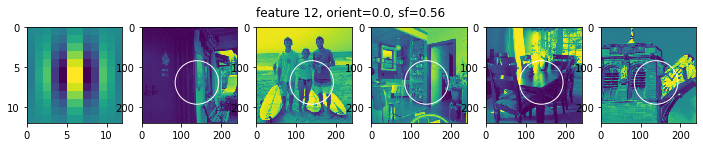

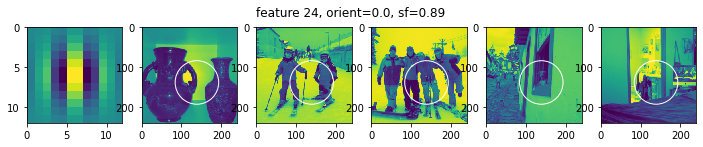

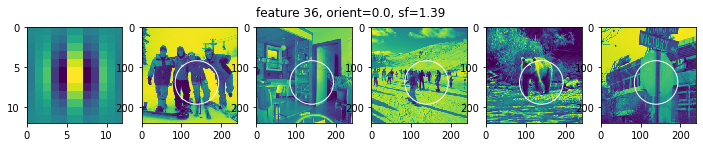

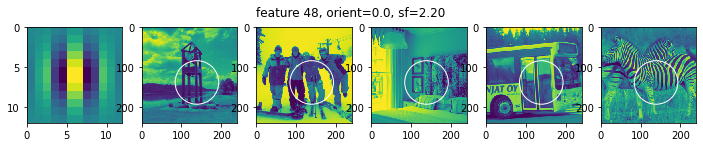

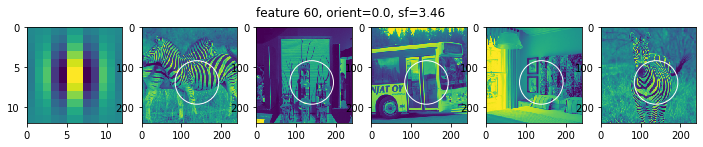

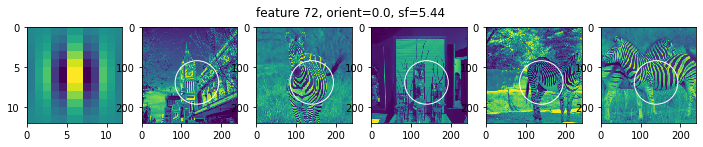

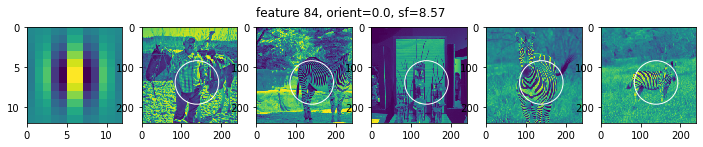

In [51]:
features_to_plot = np.where(ori_deg==0.0)[0]
plot_top_ims(features_to_plot, top_n=5)